### T2 - PRINCIPAL COMPONENT ANALYSIS (PCA): Handwritten numbers dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
from sklearn import decomposition
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

In [2]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

So we are dealing with 8 by 8 images. Big pog. 

In [3]:
X.shape, y.shape

((1797, 64), (1797,))

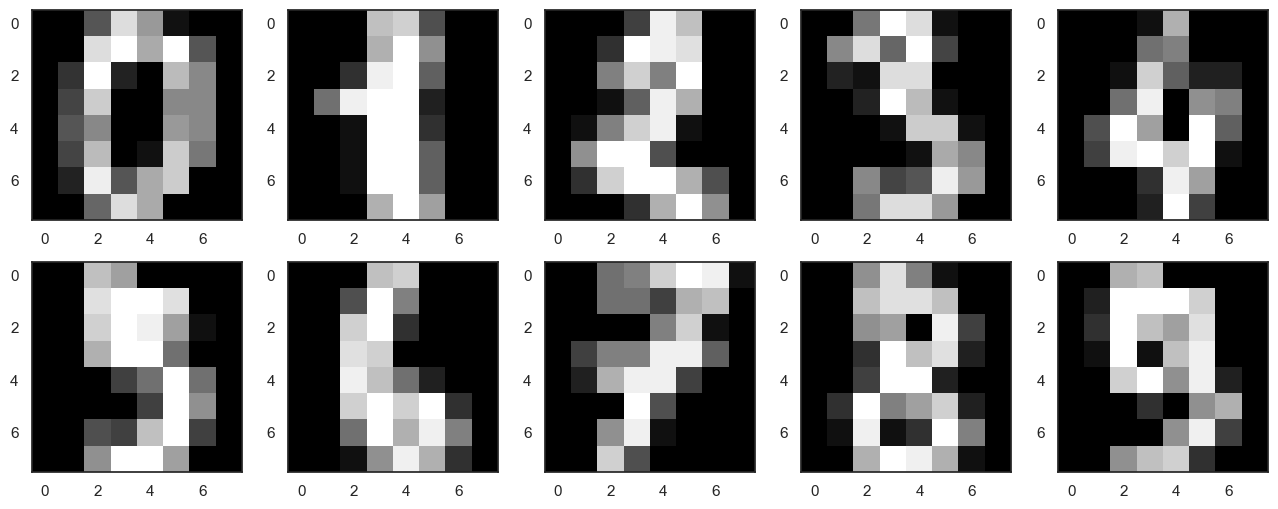

In [4]:
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8,8]), cmap='gray');

Projecting 64-dimensional data to 2D


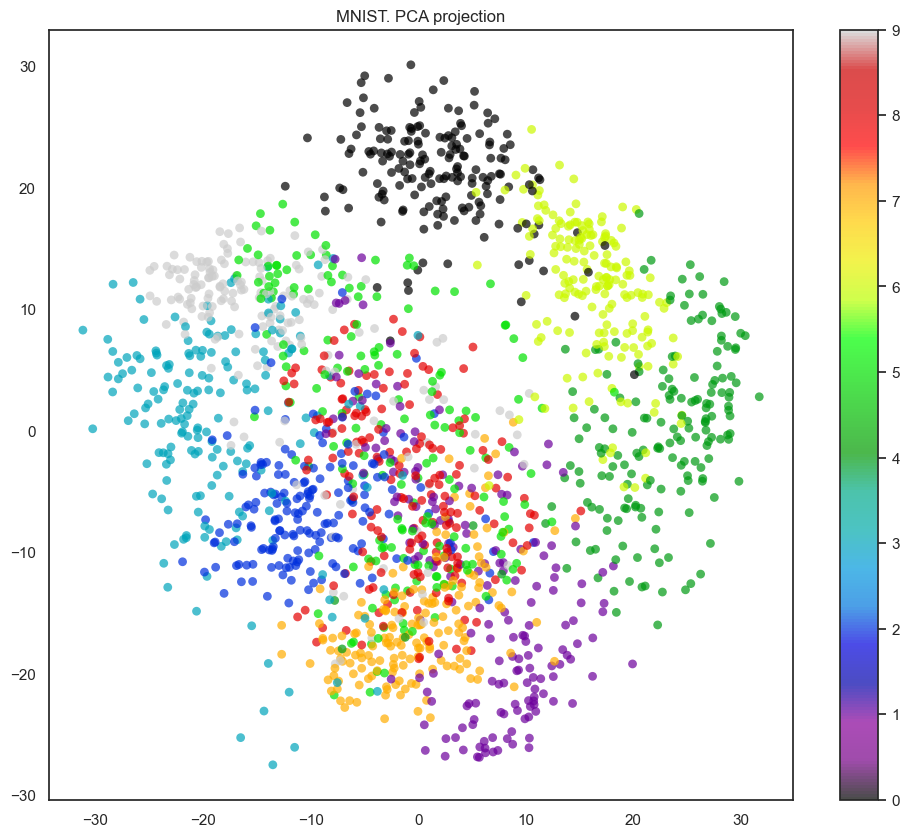

In [13]:

from sklearn.decomposition import PCA
import matplotlib

# Perform PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Print the projection message
print('Projecting %d-dimensional data to 2D' % X.shape[1])

# Create the plot
plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, edgecolor='none', alpha=0.7, s=40, 
            cmap=matplotlib.colormaps['nipy_spectral'])
plt.colorbar()
plt.title('MNIST. PCA projection')
plt.show()

# T-SNE (non-parametric)

The provided code is using t-SNE (t-Distributed Stochastic Neighbor Embedding) for dimensionality reduction and visualization of high-dimensional data, specifically for the MNIST dataset.

### What's t-SNE? 
t-SNE is a machine learning algorithm for visualization and dimensionality reduction. It is particularly well-suited for embedding high-dimensional data into a space of two or three dimensions, which can then be visualized in a scatter plot. t-SNE works by converting the high-dimensional Euclidean distances between points into conditional probabilities that represent similarities. 
The algorithm then uses a gradient descent method to minimize the divergence between these probabilities in the high-dimensional and reduced-dimensional spaces, effectively arranging points in a way that preserves the local structure of the data.

It's non-parametric in the way that the algorithm doesn't assume any specific parametric form of the data. There are no assumptions, which makes it very flexible, but it means that results can vary depending on the choice of hyperparameters. 

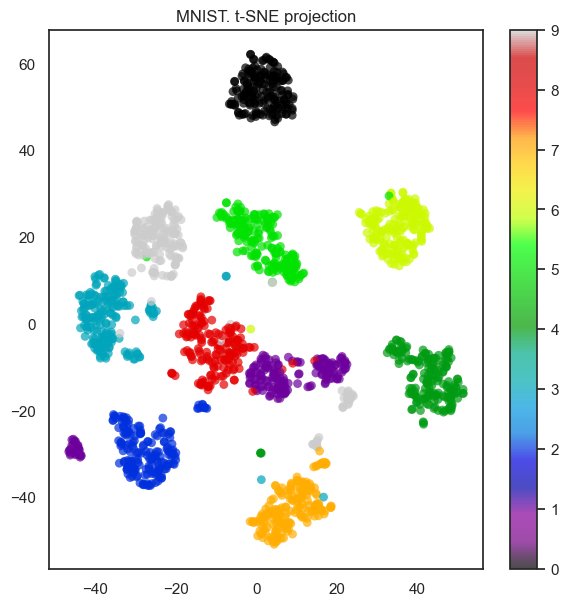

In [16]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=17)

X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(7,7))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, edgecolor='none', alpha=0.7, s=40, cmap=matplotlib.colormaps['nipy_spectral'])
plt.colorbar()
plt.title('MNIST. t-SNE projection');

Now going back to PCA: 
* We're going to plot the variance vs. the number of components and place the 90% target. 
* So we are able to know which number of PC's obtain which variance explanation. 

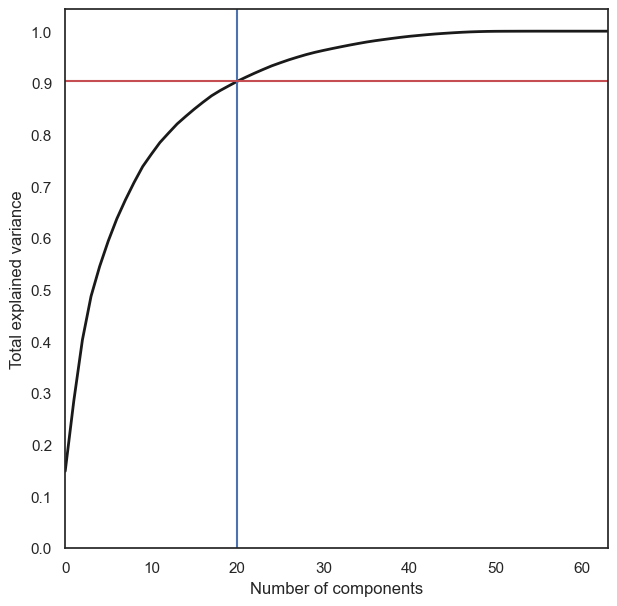

In [17]:
pca = PCA().fit(X)
idx = np.where(np.cumsum(pca.explained_variance_ratio_)>0.9)[0][0]
exp_var = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(7,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(idx, c='b')
plt.axhline(exp_var[idx], c='r')
plt.show();